In [1]:
import mne
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
%matplotlib notebook

import warnings
warnings.filterwarnings("ignore")

In [2]:
subj1 = mne.read_epochs('subj1_exp1_female_neutral_epoched.fif', preload = True)
subj2 = mne.read_epochs('subj2_exp1_male_neutral_epoched.fif', preload = True)
subj3 = mne.read_epochs('subj3_exp1_female_sad_epoched.fif', preload = True)
subj4 = mne.read_epochs('subj4_exp1_male_sad_epoched.fif', preload = True)
subj5 = mne.read_epochs('subj6_exp2_female_happy_epoched.fif', preload = True)
subj6 = mne.read_epochs('subj8_exp2_male_happy_epoched.fif', preload = True)

df1 = subj1.to_data_frame()
df2 = subj2.to_data_frame()
df3 = subj3.to_data_frame()
df4 = subj4.to_data_frame()
df5 = subj5.to_data_frame()
df6 = subj6.to_data_frame()

Reading C:\Users\Wei\Downloads\subj1_exp1_female_neutral_epoched.fif ...
    Found the data of interest:
        t =       0.00 ...    1200.00 ms
        0 CTF compensation matrices available
Not setting metadata
240 matching events found
No baseline correction applied
0 projection items activated
Reading C:\Users\Wei\Downloads\subj2_exp1_male_neutral_epoched.fif ...
    Found the data of interest:
        t =       0.00 ...    1200.00 ms
        0 CTF compensation matrices available
Not setting metadata
240 matching events found
No baseline correction applied
0 projection items activated
Reading C:\Users\Wei\Downloads\subj3_exp1_female_sad_epoched.fif ...
    Found the data of interest:
        t =       0.00 ...    1200.00 ms
        0 CTF compensation matrices available
Not setting metadata
240 matching events found
No baseline correction applied
0 projection items activated
Reading C:\Users\Wei\Downloads\subj4_exp1_male_sad_epoched.fif ...
    Found the data of interest:
        t 

In [3]:
df1 = df1.drop(columns=['time','condition','epoch','EOG','EKG','AudioOutput'])
df2 = df2.drop(columns=['time','condition','epoch','EOG','EKG','AudioOutput'])
df3 = df3.drop(columns=['time','condition','epoch','EOG','EKG','AudioOutput'])
df4 = df4.drop(columns=['time','condition','epoch','EOG','EKG','AudioOutput'])
df5 = df5.drop(columns=['time','condition','epoch','EKG','AudioOutput','Below Eye','Left Mastoid','Empty'])
df6 = df6.drop(columns=['time','condition','epoch','EKG','AudioOutput','Below Eye','Left Mastoid','Empty'])

In [4]:
df1.head()

,Fz,F3,F7,FT9,FC5,FC1,C3,T7,TP9,CP5,...,CP4,TP8,C6,C2,FC4,FT8,F6,F2,AF4,AF8
0,13.403686,12.878690,4.478493,37.312580,10.605014,14.942951,9.596916,27.118202,-11.689203,-9.628132,...,-11.279607,-0.748562,-7.210115,1.367431,12.490921,19.888008,25.756473,13.865808,2.939538,19.032244
1,12.420540,13.001721,7.772529,39.451244,9.962269,14.155886,7.288918,20.657593,-10.319021,-10.616848,...,-13.305573,-5.308448,-12.354294,0.688922,9.236158,13.674670,23.820566,11.877275,15.577285,9.245463
2,12.640422,14.095266,12.895287,44.724075,8.092465,16.041201,7.018389,-5.808337,-6.225731,-14.791474,...,-13.395988,-6.568949,-12.625440,0.314471,8.920679,14.417510,22.679871,11.038879,19.012875,3.617572
3,11.105573,12.158572,12.681792,42.639130,3.287644,15.531861,7.054061,-9.044118,-8.469246,-14.451814,...,-12.512151,-3.064110,-9.022336,1.073749,7.603745,19.891987,18.224661,9.939410,15.867851,9.090335
4,12.461385,11.080499,10.914294,36.256626,6.115564,15.541151,6.804139,-3.098480,-14.484407,-14.123993,...,-12.226441,0.130914,-8.473376,1.491776,8.506056,18.757141,16.962978,9.728893,13.831758,25.210558


In [5]:
#normalized data
scaler = MinMaxScaler()
scaler.fit(df1)
df_norm1=scaler.transform(df1)

scaler = MinMaxScaler()
scaler.fit(df2)
df_norm2=scaler.transform(df2)

scaler = MinMaxScaler()
scaler.fit(df3)
df_norm3=scaler.transform(df3)

scaler = MinMaxScaler()
scaler.fit(df4)
df_norm4=scaler.transform(df4)

scaler = MinMaxScaler()
scaler.fit(df5)
df_norm5=scaler.transform(df5)

scaler = MinMaxScaler()
scaler.fit(df6)
df_norm6=scaler.transform(df6)

# visualizing features and target
df_norm1 = pd.DataFrame(df1, columns = df1.columns)
df_norm2 = pd.DataFrame(df2, columns = df2.columns)
df_norm3 = pd.DataFrame(df3, columns = df3.columns)
df_norm4 = pd.DataFrame(df4, columns = df4.columns)
df_norm5 = pd.DataFrame(df5, columns = df5.columns)
df_norm6 = pd.DataFrame(df6, columns = df6.columns)

In [6]:
df_norm1.head()

,Fz,F3,F7,FT9,FC5,FC1,C3,T7,TP9,CP5,...,CP4,TP8,C6,C2,FC4,FT8,F6,F2,AF4,AF8
0,13.403686,12.878690,4.478493,37.312580,10.605014,14.942951,9.596916,27.118202,-11.689203,-9.628132,...,-11.279607,-0.748562,-7.210115,1.367431,12.490921,19.888008,25.756473,13.865808,2.939538,19.032244
1,12.420540,13.001721,7.772529,39.451244,9.962269,14.155886,7.288918,20.657593,-10.319021,-10.616848,...,-13.305573,-5.308448,-12.354294,0.688922,9.236158,13.674670,23.820566,11.877275,15.577285,9.245463
2,12.640422,14.095266,12.895287,44.724075,8.092465,16.041201,7.018389,-5.808337,-6.225731,-14.791474,...,-13.395988,-6.568949,-12.625440,0.314471,8.920679,14.417510,22.679871,11.038879,19.012875,3.617572
3,11.105573,12.158572,12.681792,42.639130,3.287644,15.531861,7.054061,-9.044118,-8.469246,-14.451814,...,-12.512151,-3.064110,-9.022336,1.073749,7.603745,19.891987,18.224661,9.939410,15.867851,9.090335
4,12.461385,11.080499,10.914294,36.256626,6.115564,15.541151,6.804139,-3.098480,-14.484407,-14.123993,...,-12.226441,0.130914,-8.473376,1.491776,8.506056,18.757141,16.962978,9.728893,13.831758,25.210558


In [7]:
sum1 = df_norm1.sum(axis=0)
sum2 = df_norm2.sum(axis=0)
sum3 = df_norm3.sum(axis=0)
sum4 = df_norm4.sum(axis=0)
sum5 = df_norm5.sum(axis=0)
sum6 = df_norm6.sum(axis=0)


In [8]:
df = pd.DataFrame(data=sum1)
df[1] = sum2
df[2] = sum3
df[3] = sum4
df[4] = sum5
df[5] = sum6
df = df.fillna(0).transpose()

In [9]:
#0 represents neutral mood, 1 = sad mood, 2 = happy mood
df['Mood'] = [0,0,1,1,2,2]

In [10]:
df

,Fz,F3,F7,FT9,FC5,FC1,C3,T7,TP9,CP5,...,TP8,C6,C2,FC4,FT8,F6,F2,AF4,AF8,Mood
0,0.000307,-0.000339,-0.000333,0.000415,0.000198,-0.000401,-0.000203,0.000291,0.001245,0.000038,...,-0.000437,-0.000970,-0.000538,0.000667,-0.000726,-0.000941,-0.000046,0.001296,-0.001680,0
1,0.001058,0.001354,0.000316,-0.009199,0.001156,-0.000288,0.000626,-0.000991,-0.000807,0.001336,...,0.001194,-0.000754,-0.000071,0.000585,0.002803,-0.001939,0.000834,0.006178,0.004236,0
2,0.000952,0.001643,-0.000502,0.001566,-0.001529,-0.000383,0.000677,0.000378,0.000311,-0.000119,...,-0.000269,-0.000222,0.000681,0.000450,0.000288,-0.001442,-0.000038,0.002986,0.001063,1
3,0.000651,-0.001766,-0.003674,-0.002067,-0.000498,-0.000707,0.000732,0.002060,0.000751,0.000689,...,-0.000647,-0.000676,0.000765,-0.000052,0.000164,-0.000618,-0.000682,-0.000363,-0.002329,1
4,-0.000059,0.001195,-0.001559,0.000000,0.000429,-0.000101,0.000387,0.000544,0.000000,0.000080,...,0.000484,0.000270,-0.000079,-0.001612,-0.002216,-0.001741,0.000016,-0.001023,-0.000601,2
5,0.000729,-0.000161,0.000245,0.000000,0.001192,-0.000481,0.000330,-0.000188,0.000000,0.000021,...,0.000517,0.000358,0.000688,0.000450,0.001327,-0.000389,0.000883,-0.000659,0.000625,2


In [11]:
target = df['Mood']
data = df.drop(columns = ['Mood'])

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

def train_and_validate(X_train, X_test, y_train, y_test):
    mode = GaussianNB()    
    mode.fit(X_train, y_train);
    y_calc = mode.predict(X_test)
    y_prob = mode.predict_proba(X_test)
    mat = confusion_matrix(y_test, y_calc)
    #sns.heatmap(mat.T, annot=True, cbar = False)

X_train, X_test, y_train, y_test = train_test_split(df, target, test_size = 0.10, random_state=0)
train_and_validate(X_train, X_test, y_train, y_test)

Train accuracy: 1.0
Test accuracy: 0.0


<IPython.core.display.Javascript object>


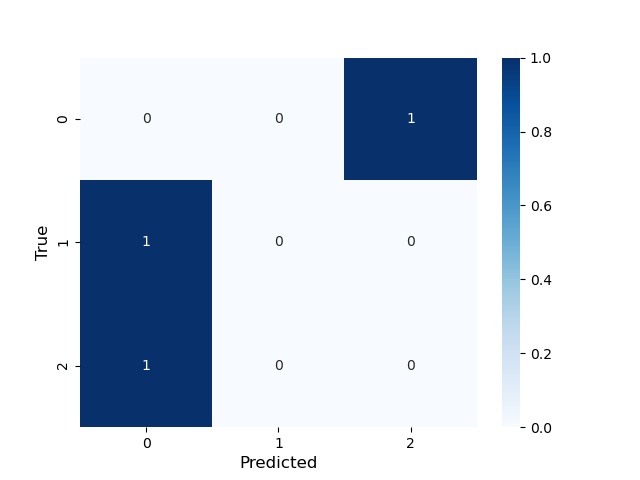


Test confusion_matrix


Text(50.722222222222214, 0.5, 'True')

In [14]:
#Base Model for RandomForest
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)


dtclf = RandomForestClassifier(random_state = 0)
dtclf.fit(X_train, y_train.values.ravel())
y_pred = dtclf.predict(X_test) # Predictions
y_true = y_test # True values


print("Train accuracy:", np.round(accuracy_score(y_train, 
                                                 dtclf.predict(X_train)), 2))
print("Test accuracy:", np.round(accuracy_score(y_true, y_pred), 2))

plt.figure()
cf_matrix = confusion_matrix(y_true, y_pred)
print("\nTest confusion_matrix") 
sns.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)

Optimal hyperparameter combination: {'min_samples_split': 10, 'min_samples_leaf': 8, 'max_depth': 3}

Mean cross-validated training accuracy score: 0.41666666666666663
Test accuracy: 0.0


<IPython.core.display.Javascript object>


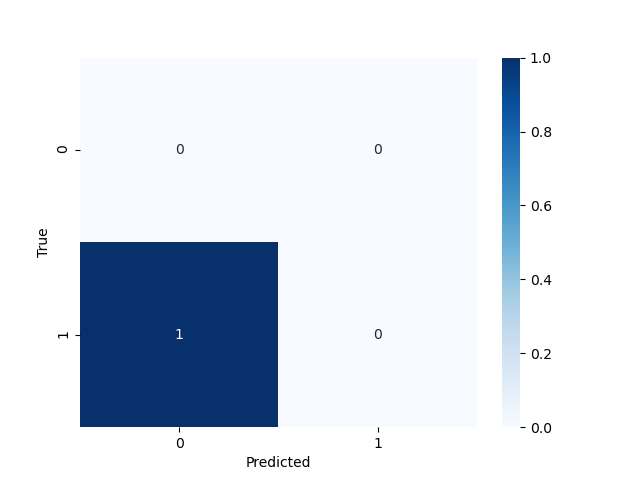

Execution time of Random Search (in Seconds): 3.2612524032592773



In [15]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

def train_and_validate(X_train, X_test, y_train, y_test):
    mode = GaussianNB()    
    mode.fit(X_train, y_train);
    y_calc = mode.predict(X_test)
    y_prob = mode.predict_proba(X_test)
    mat = confusion_matrix(y_test, y_calc)
    #sns.heatmap(mat.T, annot=True, cbar = False)

X_train, X_test, y_train, y_test = train_test_split(df, target, test_size = 0.10, random_state=0)
train_and_validate(X_train, X_test, y_train, y_test)

#RandomSearch for RandomForest
import time
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import RandomizedSearchCV

start = time.time()

# Defining 3-dimensional hyperparameter space as a Python dictionary
hyperparameter_space = {'max_depth':[2,3,4,6,8,10,12,15,20], 
                        'min_samples_leaf':[1,2,4,6,8,10,20,30],
                        'min_samples_split':[2,3,4,5,6,8,10]}


rs = RandomizedSearchCV(dtclf, param_distributions=hyperparameter_space,
                        n_iter=10, scoring="accuracy", random_state=0,
                        n_jobs=-1, cv=2, return_train_score=True)

rs.fit(X_train, y_train.values.ravel())
print("Optimal hyperparameter combination:", rs.best_params_)
print()
print("Mean cross-validated training accuracy score:",
      rs.best_score_)
rs.best_estimator_.fit(X_train, y_train.values.ravel())
y_pred = rs.best_estimator_.predict(X_test) # Predictions
y_true = y_test # True values

print("Test accuracy:", np.round(accuracy_score(y_true, y_pred), 2))
cf_matrix = confusion_matrix(y_true, y_pred)

plt.figure()
sns.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')

end = time.time()
diff = end - start
print('Execution time of Random Search (in Seconds):', diff)
print()

In [16]:
#grid searching key hyperparameters for RandomForestClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier


# define models and parameters
model = RandomForestClassifier()
n_estimators = [10, 100, 1000]
max_features = ['sqrt', 'log2']

# define grid search
grid = dict(n_estimators=n_estimators,max_features=max_features)
cv = RepeatedStratifiedKFold(n_splits=2, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train.values.ravel())

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.472222 using {'max_features': 'log2', 'n_estimators': 1000}
0.444444 (0.229061) with: {'max_features': 'sqrt', 'n_estimators': 10}
0.333333 (0.166667) with: {'max_features': 'sqrt', 'n_estimators': 100}
0.416667 (0.083333) with: {'max_features': 'sqrt', 'n_estimators': 1000}
0.416667 (0.083333) with: {'max_features': 'log2', 'n_estimators': 10}
0.250000 (0.186339) with: {'max_features': 'log2', 'n_estimators': 100}
0.472222 (0.114531) with: {'max_features': 'log2', 'n_estimators': 1000}


Optimal hyperparameter combination: {'kernel': 'linear', 'C': 1}

Mean cross-validated training accuracy score: 0.8333333333333333
Test accuracy: 1.0


<IPython.core.display.Javascript object>


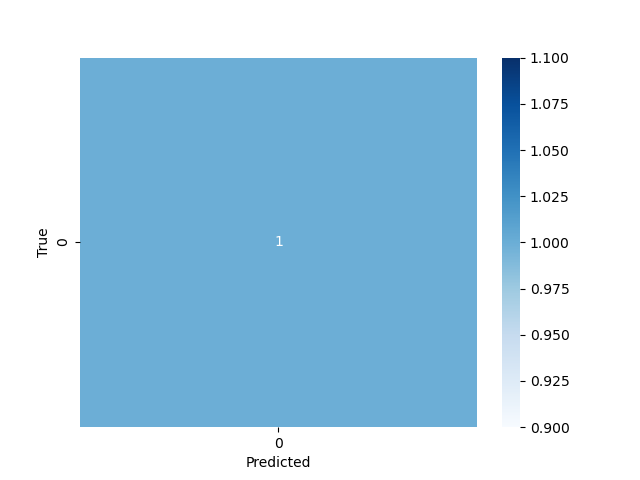

Execution time of Random Search (in Seconds): 0.1511363983154297



In [17]:
#RandomSearch for RandomForest
import time
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import RandomizedSearchCV

start = time.time()

# Defining 3-dimensional hyperparameter space as a Python dictionary
hyperparameter_space = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
svc = svm.SVC()
svc.fit(X_train, y_train.values.ravel())

rs = RandomizedSearchCV(svc, param_distributions=hyperparameter_space,
                        n_iter=10, scoring="accuracy", random_state=0,
                        n_jobs=-1, cv=2, return_train_score=True)

rs.fit(X_train, y_train.values.ravel())
print("Optimal hyperparameter combination:", rs.best_params_)
print()
print("Mean cross-validated training accuracy score:",
      rs.best_score_)
rs.best_estimator_.fit(X_train, y_train.values.ravel())
y_pred = rs.best_estimator_.predict(X_test) # Predictions
y_true = y_test # True values

print("Test accuracy:", np.round(accuracy_score(y_true, y_pred), 2))
cf_matrix = confusion_matrix(y_true, y_pred)

plt.figure()
sns.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')

end = time.time()
diff = end - start
print('Execution time of Random Search (in Seconds):', diff)
print()

# SVC

In [18]:
#grid searching key hyperparametres for SVC
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

def train_and_validate(X_train, X_test, y_train, y_test):
    mode = GaussianNB()    
    mode.fit(X_train, y_train);
    y_calc = mode.predict(X_test)
    y_prob = mode.predict_proba(X_test)
    mat = confusion_matrix(y_test, y_calc)
    #sns.heatmap(mat.T, annot=True, cbar = False)

X_train, X_test, y_train, y_test = train_test_split(df, target, test_size = 0.1, random_state=0)
train_and_validate(X_train, X_test, y_train, y_test)

#grid searching key hyperparametres for SVC v2
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# define model and parameters
model = SVC()
kernel = ['poly', 'rbf', 'sigmoid']
C = [50, 10, 1.0, 0.1, 0.01]
gamma = ['scale']

# define grid search
grid = dict(kernel=kernel,C=C,gamma=gamma)
cv = RepeatedStratifiedKFold(n_splits=2, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train.values.ravel())

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.833333 using {'C': 50, 'gamma': 'scale', 'kernel': 'poly'}
0.833333 (0.166667) with: {'C': 50, 'gamma': 'scale', 'kernel': 'poly'}
0.833333 (0.166667) with: {'C': 50, 'gamma': 'scale', 'kernel': 'rbf'}
0.583333 (0.083333) with: {'C': 50, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.833333 (0.166667) with: {'C': 10, 'gamma': 'scale', 'kernel': 'poly'}
0.833333 (0.166667) with: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
0.583333 (0.083333) with: {'C': 10, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.833333 (0.166667) with: {'C': 1.0, 'gamma': 'scale', 'kernel': 'poly'}
0.833333 (0.166667) with: {'C': 1.0, 'gamma': 'scale', 'kernel': 'rbf'}
0.583333 (0.083333) with: {'C': 1.0, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.833333 (0.166667) with: {'C': 0.1, 'gamma': 'scale', 'kernel': 'poly'}
0.833333 (0.166667) with: {'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}
0.583333 (0.083333) with: {'C': 0.1, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.833333 (0.166667) with: {'C': 0.01, 'gamma': 'scale',

# RandomForest

Optimal hyperparameter combination: {'min_samples_split': 10, 'min_samples_leaf': 8, 'max_depth': 3}

Mean cross-validated training accuracy score: 0.41666666666666663
Test accuracy: 0.0


<IPython.core.display.Javascript object>


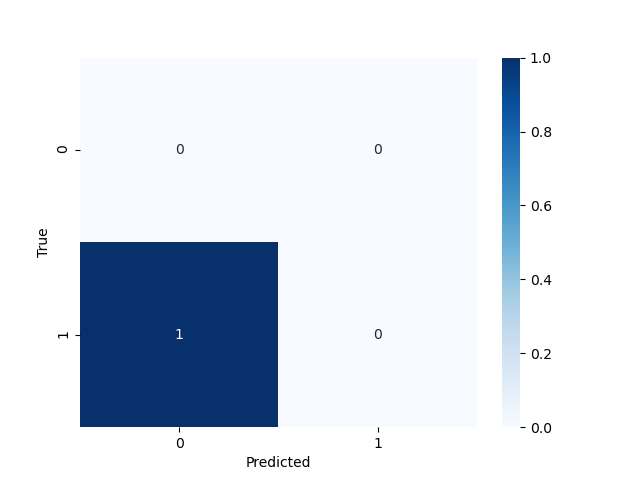

Execution time of Random Search (in Seconds): 0.9273512363433838



In [19]:
#RandomSearch for RandomForest
import time
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import RandomizedSearchCV

start = time.time()

# Defining 3-dimensional hyperparameter space as a Python dictionary
hyperparameter_space = {'max_depth':[2,3,4,6,8,10,12,15,20], 
                        'min_samples_leaf':[1,2,4,6,8,10,20,30],
                        'min_samples_split':[2,3,4,5,6,8,10]}


rs = RandomizedSearchCV(dtclf, param_distributions=hyperparameter_space,
                        n_iter=10, scoring="accuracy", random_state=0,
                        n_jobs=-1, cv=2, return_train_score=True)

rs.fit(X_train, y_train.values.ravel())
print("Optimal hyperparameter combination:", rs.best_params_)
print()
print("Mean cross-validated training accuracy score:",
      rs.best_score_)
rs.best_estimator_.fit(X_train, y_train.values.ravel())
y_pred = rs.best_estimator_.predict(X_test) # Predictions
y_true = y_test # True values

print("Test accuracy:", np.round(accuracy_score(y_true, y_pred), 2))
cf_matrix = confusion_matrix(y_true, y_pred)

plt.figure()
sns.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')

end = time.time()
diff = end - start
print('Execution time of Random Search (in Seconds):', diff)
print()

# Logistic Regression

In [20]:
#grid searching key hyperparametres for logistic regression
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression


# define models and parameters
model = LogisticRegression(max_iter=1000)
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=2, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train.values.ravel())

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.833333 using {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.833333 (0.166667) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.833333 (0.166667) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.833333 (0.166667) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.833333 (0.166667) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.833333 (0.166667) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.583333 (0.083333) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.833333 (0.166667) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.833333 (0.166667) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.583333 (0.083333) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.833333 (0.166667) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.833333 (0.166667) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.583333 (0.083333) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.833333 (0.166667) wit

# K-Nearest Neighbors

In [21]:
#grid searching key hyperparametres for KNeighborsClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# define models and parameters
model = KNeighborsClassifier()
n_neighbors = range(1, 21, 2)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']

# define grid search
grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)
cv = RepeatedStratifiedKFold(n_splits=2, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train.values.ravel())

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.833333 using {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}
0.833333 (0.166667) with: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}
0.833333 (0.166667) with: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'distance'}
0.250000 (0.250000) with: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
0.500000 (0.500000) with: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
0.000000 (0.000000) with: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}
0.000000 (0.000000) with: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}
0.000000 (0.000000) with: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}
0.000000 (0.000000) with: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'distance'}
0.000000 (0.000000) with: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'}
0.000000 (0.000000) with: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'distance'}
0.000000 (

# Bagging Classifier

In [22]:
#grid searching key hyperparameters for BaggingClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier

# define models and parameters
model = BaggingClassifier()
n_estimators = [10, 100, 1000]

# define grid search
grid = dict(n_estimators=n_estimators)
cv = RepeatedStratifiedKFold(n_splits=2, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train.values.ravel())

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
    

Best: 0.472222 using {'n_estimators': 10}
0.472222 (0.114531) with: {'n_estimators': 10}
0.333333 (0.166667) with: {'n_estimators': 100}
0.416667 (0.083333) with: {'n_estimators': 1000}


Training accuracy: 1.0


<IPython.core.display.Javascript object>


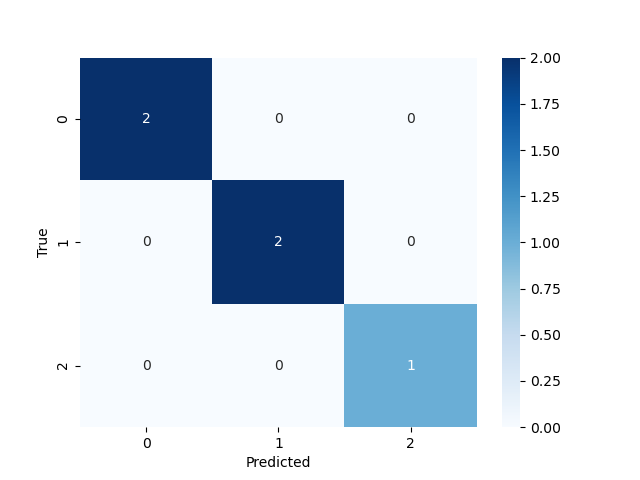

Execution time of Random Search (in Seconds): 4.030876874923706



In [23]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=1, metric = 'euclidean', weights = 'uniform')
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_train) # Predictions
y_true = y_train # True values

print("Training accuracy:", np.round(accuracy_score(y_true, y_pred), 2))
cf_matrix = confusion_matrix(y_true, y_pred)

plt.figure()
sns.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')

end = time.time()
diff = end - start
print('Execution time of Random Search (in Seconds):', diff)
print()

Testing accuracy: 0.0


<IPython.core.display.Javascript object>


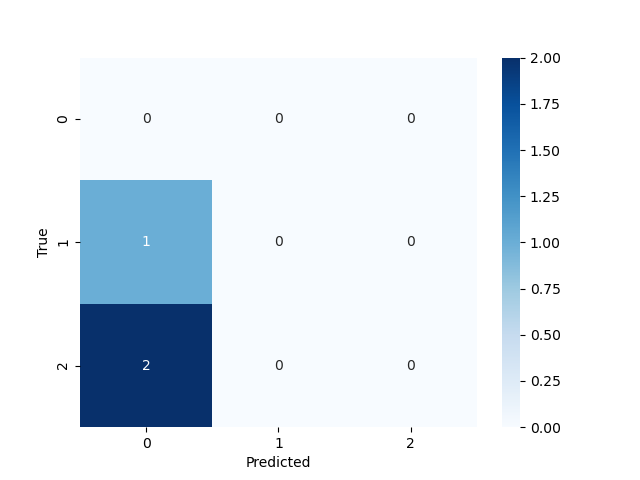

Execution time of Random Search (in Seconds): 1538.437893152237



In [60]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=1, metric = 'euclidean', weights = 'uniform')
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test) # Predictions
y_true = y_test # True values

print("Testing accuracy:", np.round(accuracy_score(y_true, y_pred), 2))
cf_matrix = confusion_matrix(y_true, y_pred)

plt.figure()
sns.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')

end = time.time()
diff = end - start
print('Execution time of Random Search (in Seconds):', diff)
print()

Optimal hyperparameter combination: {'min_samples_split': 10, 'min_samples_leaf': 8, 'max_depth': 3}

Mean cross-validated training accuracy score: 0.41666666666666663
Test accuracy: 0.0


<IPython.core.display.Javascript object>


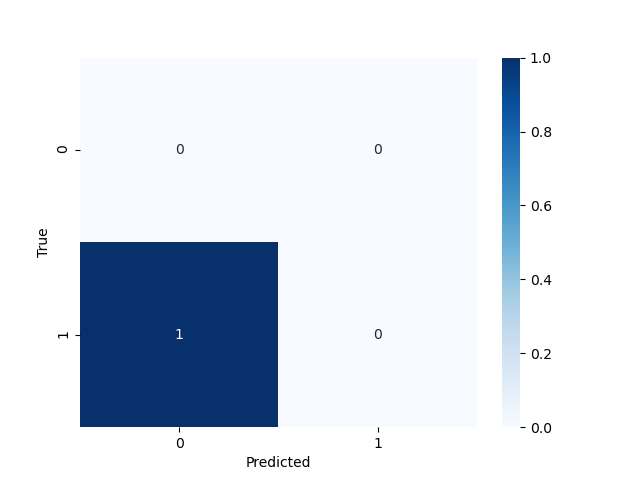

Execution time of Random Search (in Seconds): 0.7143187522888184



In [25]:
#RandomSearch for RandomForest
import time
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import RandomizedSearchCV

start = time.time()

# Defining 3-dimensional hyperparameter space as a Python dictionary
hyperparameter_space = {'max_depth':[2,3,4,6,8,10,12,15,20], 
                        'min_samples_leaf':[1,2,4,6,8,10,20,30],
                        'min_samples_split':[2,3,4,5,6,8,10]}


rs = RandomizedSearchCV(dtclf, param_distributions=hyperparameter_space,
                        n_iter=10, scoring="accuracy", random_state=0,
                        n_jobs=-1, cv=2, return_train_score=True)

rs.fit(X_train, y_train.values.ravel())
print("Optimal hyperparameter combination:", rs.best_params_)
print()
print("Mean cross-validated training accuracy score:",
      rs.best_score_)
rs.best_estimator_.fit(X_train, y_train.values.ravel())
y_pred = rs.best_estimator_.predict(X_test) # Predictions
y_true = y_test # True values

print("Test accuracy:", np.round(accuracy_score(y_true, y_pred), 2))
cf_matrix = confusion_matrix(y_true, y_pred)

plt.figure()
sns.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')

end = time.time()
diff = end - start
print('Execution time of Random Search (in Seconds):', diff)
print()

Train accuracy: 1.0
Test accuracy: 0.0


<IPython.core.display.Javascript object>


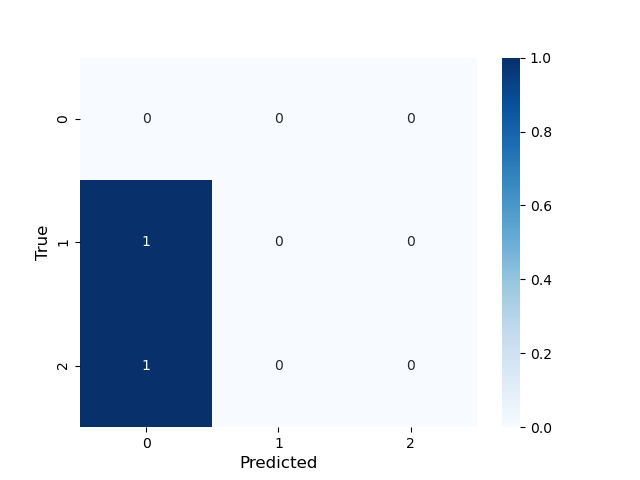


Test confusion_matrix


Text(50.722222222222214, 0.5, 'True')

In [26]:
#Base Model for RandomForest
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, 
                                                    shuffle=True, random_state=0)


dtclf = RandomForestClassifier(random_state = 0)
dtclf.fit(X_train, y_train.values.ravel())
y_pred = dtclf.predict(X_test) # Predictions
y_true = y_test # True values


print("Train accuracy:", np.round(accuracy_score(y_train, 
                                                 dtclf.predict(X_train)), 2))
print("Test accuracy:", np.round(accuracy_score(y_true, y_pred), 2))

plt.figure()
cf_matrix = confusion_matrix(y_true, y_pred)
print("\nTest confusion_matrix")
sns.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)

Training accuracy: 1.0


<IPython.core.display.Javascript object>


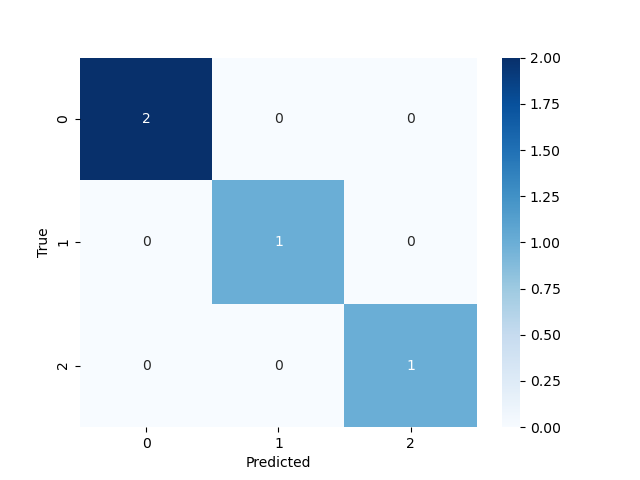

Execution time of Random Search (in Seconds): 1.0694894790649414



In [27]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

{'C': 50, 'gamma': 'scale', 'kernel': 'poly'}

model = SVC(C = 50, gamma = 'scale', kernel = 'poly')
model.fit(X_train, y_train)
y_pred = model.predict(X_train) # Predictions
y_true = y_train # True values

print("Training accuracy:", np.round(accuracy_score(y_true, y_pred), 2))
cf_matrix = confusion_matrix(y_true, y_pred)

plt.figure()
sns.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')

end = time.time()
diff = end - start
print('Execution time of Random Search (in Seconds):', diff)
print()

Testing accuracy: 0.0


<IPython.core.display.Javascript object>


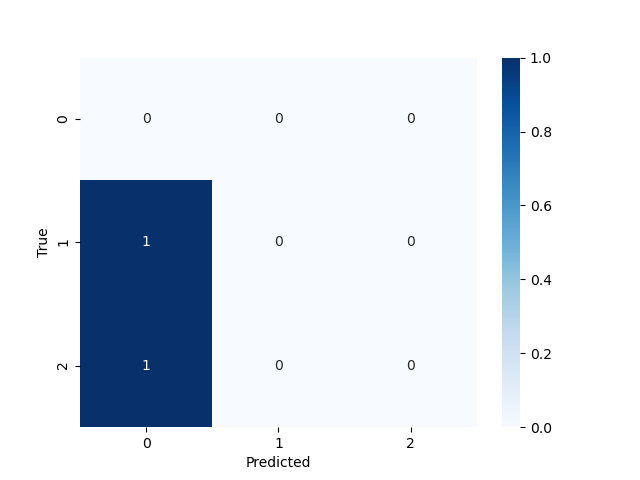

Execution time of Random Search (in Seconds): 1.171363353729248



In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

{'C': 50, 'gamma': 'scale', 'kernel': 'poly'}

model = SVC(C = 50, gamma = 'scale', kernel = 'poly')
model.fit(X_train, y_train)
y_pred = model.predict(X_test) # Predictions
y_true = y_test # True values

print("Testing accuracy:", np.round(accuracy_score(y_true, y_pred), 2))
cf_matrix = confusion_matrix(y_true, y_pred)

plt.figure()
sns.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')

end = time.time()
diff = end - start
print('Execution time of Random Search (in Seconds):', diff)
print()

Training accuracy: 1.0


<IPython.core.display.Javascript object>


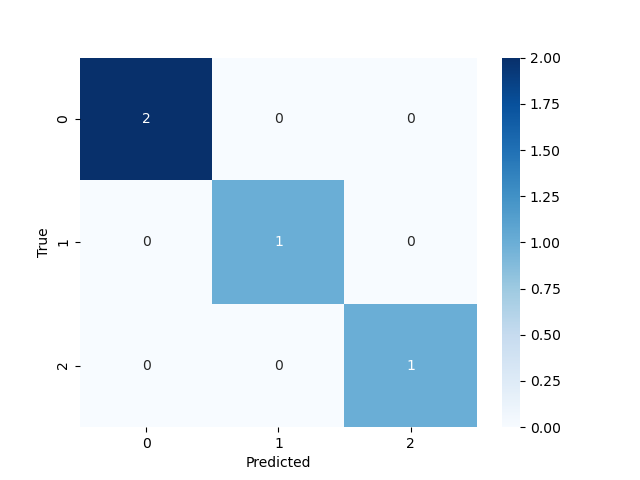

Execution time of Random Search (in Seconds): 362.8185918331146



In [58]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

{'C': 50, 'gamma': 'scale', 'kernel': 'poly'}

model = SVC(C = 50, gamma = 'scale', kernel = 'poly')
model.fit(X_train, y_train)
y_pred = model.predict(X_train) # Predictions
y_true = y_train # True values

print("Training accuracy:", np.round(accuracy_score(y_true, y_pred), 2))
cf_matrix = confusion_matrix(y_true, y_pred)

plt.figure()
sns.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')

end = time.time()
diff = end - start
print('Execution time of Random Search (in Seconds):', diff)
print()

In [59]:
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import KFold
from sklearn import tree
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(df, target, test_size = 0.10, random_state=0)
train_and_validate(X_train, X_test, y_train, y_test)

#get the score of each model
def model_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)
kf= KFold(n_splits = 2)
knn_score = []
tree_score =[]
svc_score = []
rf_score = []
lr_score = []
for train_index, test_index in kf.split(data):
    X_train, X_test, y_train, y_test = data.iloc[train_index], data.iloc[test_index], target.iloc[train_index], target.iloc[test_index]
    knn_score.append(model_score(KNN(n_neighbors = 2), X_train, X_test, y_train, y_test))
    tree_score.append(model_score(tree.DecisionTreeClassifier(), X_train, X_test, y_train, y_test))
    svc_score.append(model_score(SVC(), X_train, X_test, y_train, y_test))
    rf_score.append(model_score(RF(), X_train, X_test, y_train, y_test))
    lr_score.append(model_score(LogisticRegression(), X_train, X_test, y_train, y_test))

print("KNN Score:", knn_score)

print("RF Score:", rf_score)

print("LR Score:", lr_score)

print("SVC Score:", svc_score)

print("Tree Score:", tree_score)

KNN Score: [0.3333333333333333, 0.0]
RF Score: [0.0, 0.3333333333333333]
LR Score: [0.0, 0.0]
SVC Score: [0.0, 0.0]
Tree Score: [0.0, 0.3333333333333333]


<IPython.core.display.Javascript object>


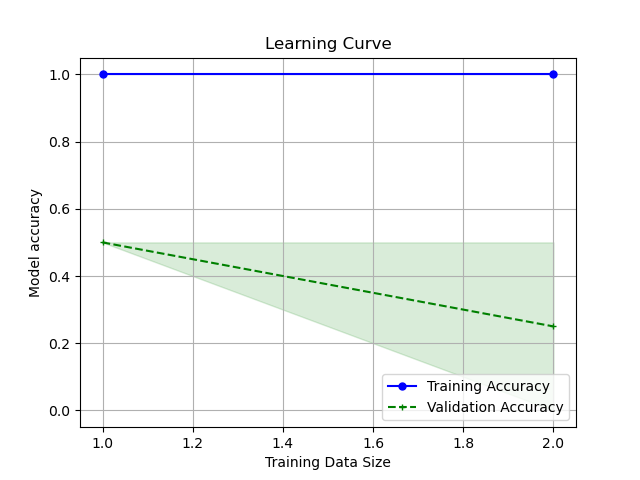

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import learning_curve
from sklearn import datasets
import matplotlib.pyplot as plt


X = data
y = target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

pipeline = Pipeline(steps=[('scaler', StandardScaler()), ('RF', RF())])

train_sizes, train_scores, test_scores = learning_curve(estimator=pipeline, X=X_train, y=y_train,
                                                       cv=2, train_sizes=np.linspace(0.1, 1.0, 10),
                                                     n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure()
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation Accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.title('Learning Curve')
plt.xlabel('Training Data Size')
plt.ylabel('Model accuracy')
plt.grid()
plt.legend(loc='lower right')
plt.show()